## Flight Price Predictor

#### The goal of this project is to perform an exploratory data analysis on this dataset and create a model that is able to predict the price of an air flight based on the certain features of this dataset.

Source of data: https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns


%matplotlib inline

In [82]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'duration_hr', 'duration_min',
       'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [5]:
df=pd.read_excel("Data_Train.xlsx")

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.shape

(10683, 11)

In [9]:
df.dtypes #checking the data types

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df.isna().sum() #Checking null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Feature Engineering

#### Date of Journey
#### I am converting the date of journey column into a datetime data type and turning the day of the flight and month of the flight into separate columns. Then I will drop the original date of journey column as when the data is in this format it is harder to visualize and use in machine learning models.

In [ ]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [13]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [15]:
df.drop(["Date_of_Journey"],axis=1,inplace=True)

#### Departure time

#### Now I will reformat the departure time column and create two new columns. One will have the deparature hour and the next one will have the departure minute. 

In [16]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [17]:
df.drop(["Dep_Time"],axis=1,inplace=True)

#### Duration Time
#### I am doing the same thing here as described above

In [18]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in 

In [19]:
df.drop(["Duration"],axis=1,inplace=True)

#### Arrival Time

In [20]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [21]:
df.drop(["Arrival_Time"],axis=1,inplace=True)

### Airline Count
#### Determining which airline is used most frequently in this dataset.

In [25]:
airlines =pd.Series(df['Airline'].value_counts())

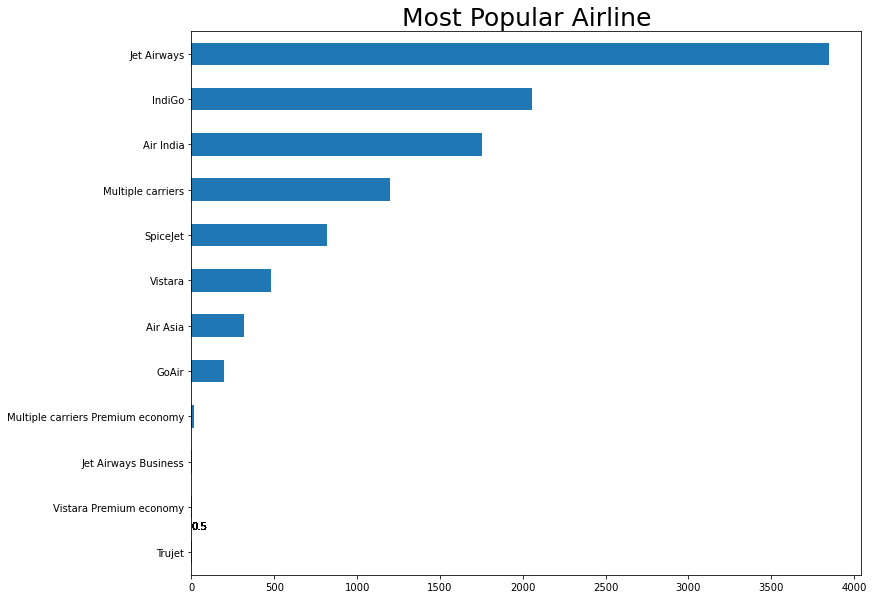

In [28]:
ax = airlines.nsmallest(n=20, keep='first').plot(kind='barh',figsize=(12,10))

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

ax.set_title("Most Popular Airlines", size=25);

#### The top 3 airlines Jet Airways, IndiGo, Air India

### Airline vs Price

In [32]:
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

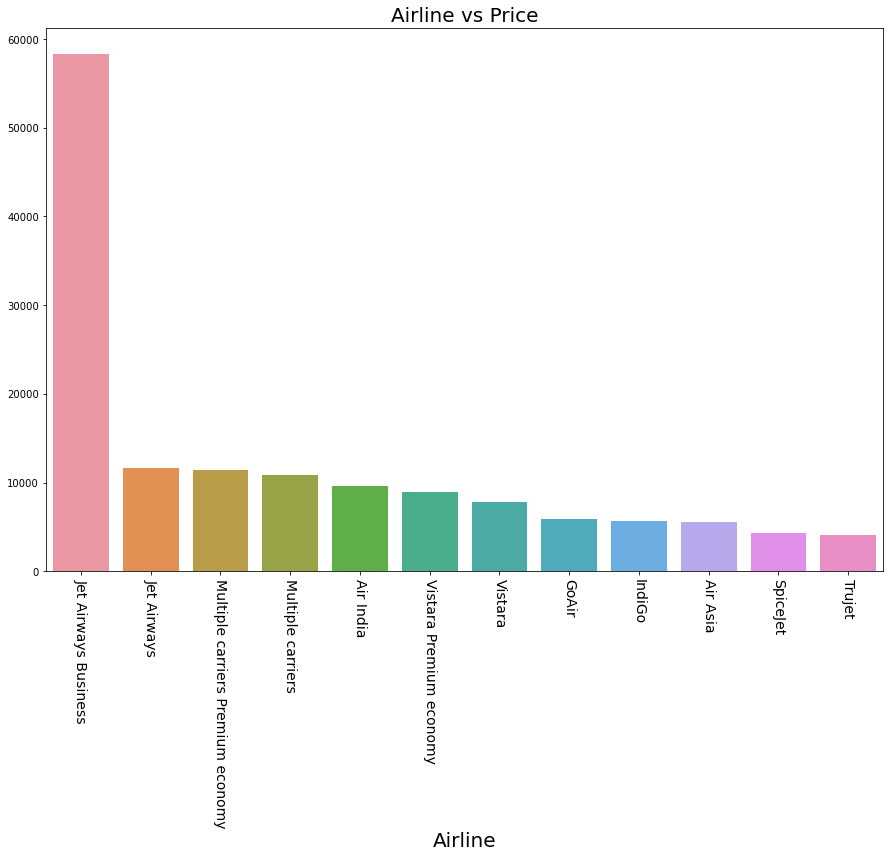

In [41]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.title("Airline vs Price", size = 20)
plt.xlabel("Airline", size = 20)
plt.xticks(rotation=270, size=14);

#### Jet Airways has a much higher price than its competitors which may explain why so few people use it.

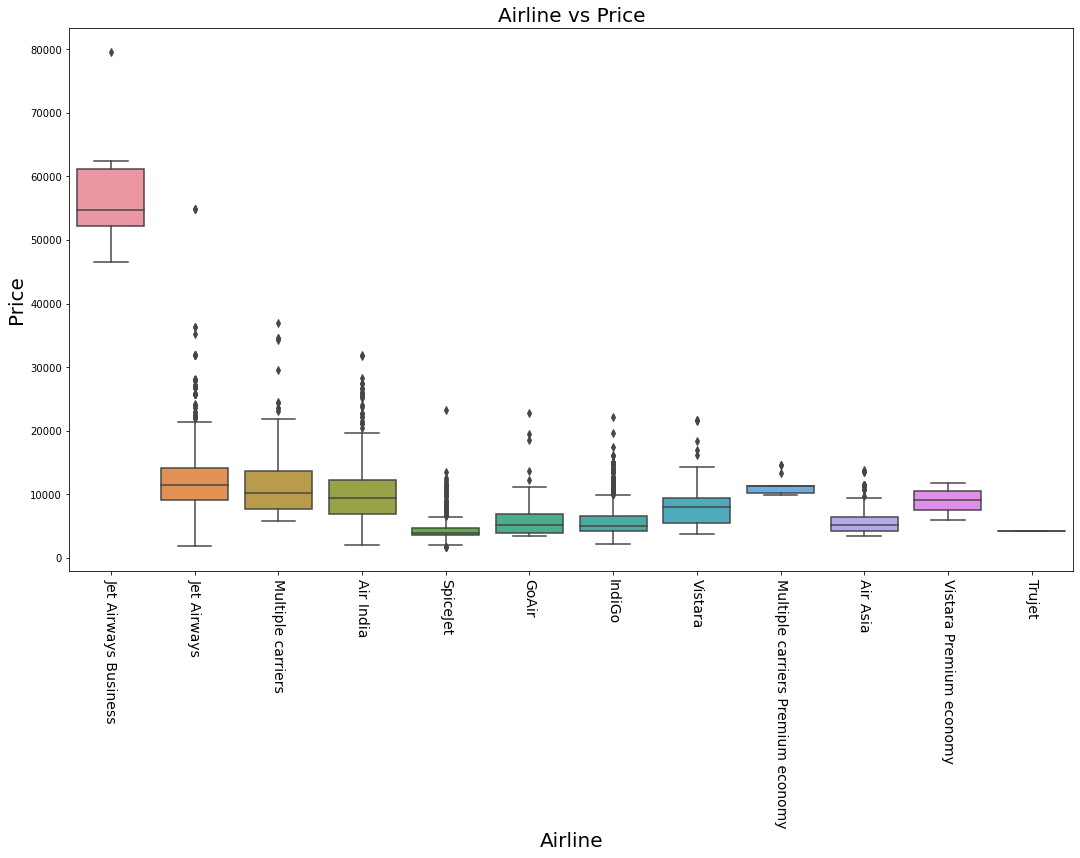

In [47]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.title("Airline vs Price", size = 20)
plt.xlabel("Airline", size = 20)
plt.ylabel("Price", size = 20)
plt.xticks(rotation=270, size=14);
plt.show;

#### All Airlines have a similar range of prices exceppt Jet Airways Business where they charge significantly more than other airlines.

### Price vs Number of Stops

### Determining the relation between the price of the flight and number of stops in the flight

In [49]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()
# Getting the average price of flights base don how many stops the flights has and
# the airline that is giving the flight

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

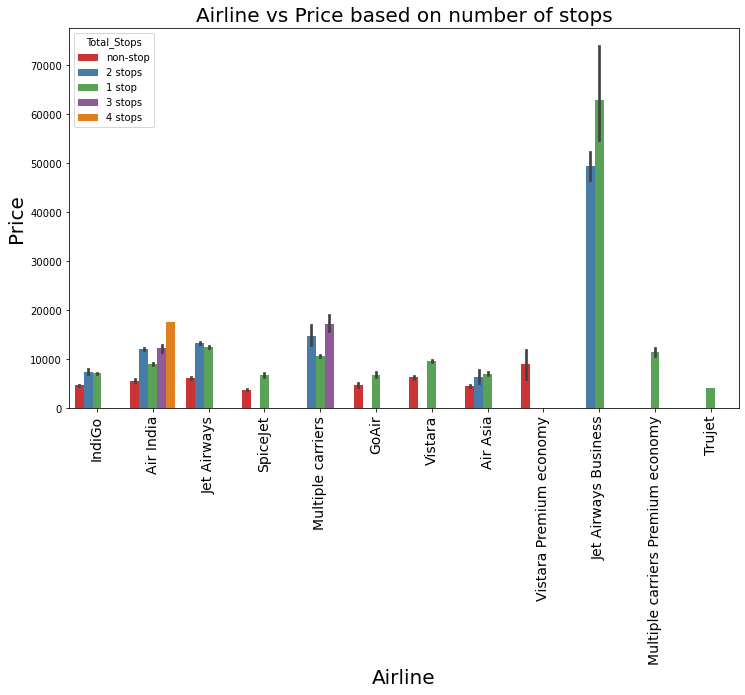

In [56]:
plt.figure(figsize=(12,7))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Airline vs Price based on number of stops", size = 20)
plt.xlabel("Airline", size = 20)
plt.ylabel("Price", size = 20)
plt.xticks(rotation=90, size=14);
plt.show()

#### It appears that non-stop air flights have the lowest prices, and flights with more stops typically have highter prices than flights with less stops.

### Determining the effect that the source of the flight has on the price

In [60]:
sources = pd.Series(df['Source'].value_counts())

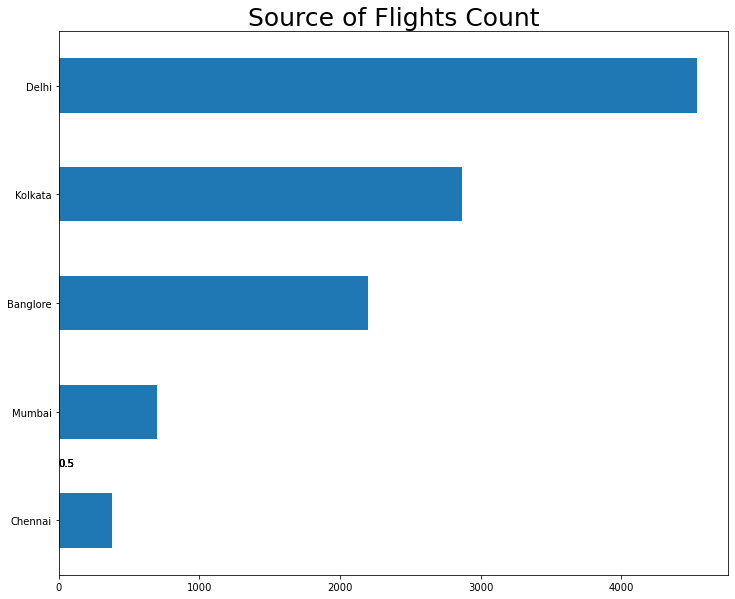

In [62]:
ax = sources.nsmallest(n=20, keep='first').plot(kind='barh',figsize=(12,10))
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))
ax.set_title("Source of Flights Count", size=25);

#### Most people fly from the Delhi airport and less people fly from Chennai airport

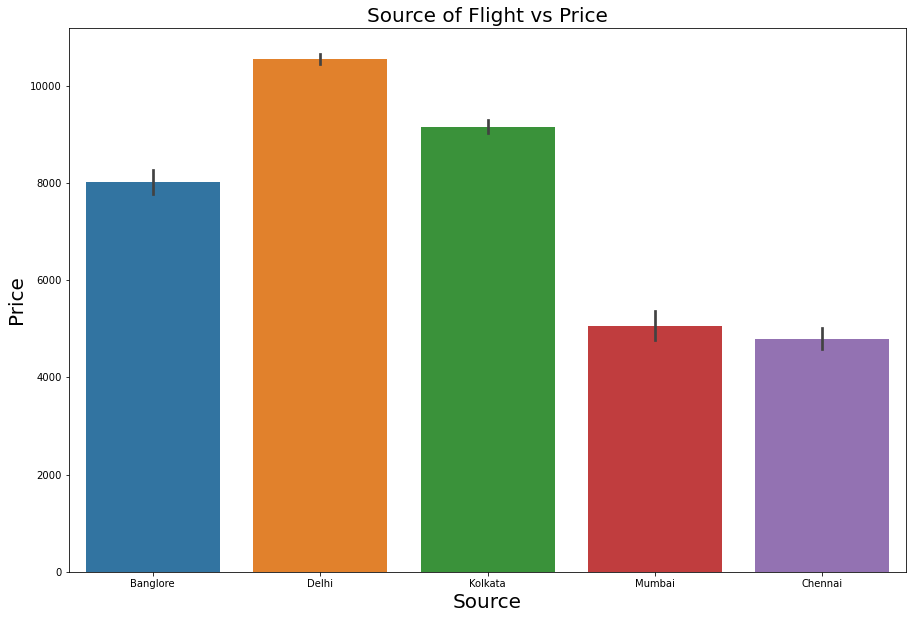

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.title("Source of Flight vs Price", size = 20)
plt.xlabel("Source", size = 20)
plt.ylabel("Price", size = 20)
plt.show;

#### People who fly from Delhi pay more while people who fly from Chennai pay less for their flight.

### Determining the effect that the destination of the flight has on the price

In [69]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [72]:
df['Destination'].unique()


array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

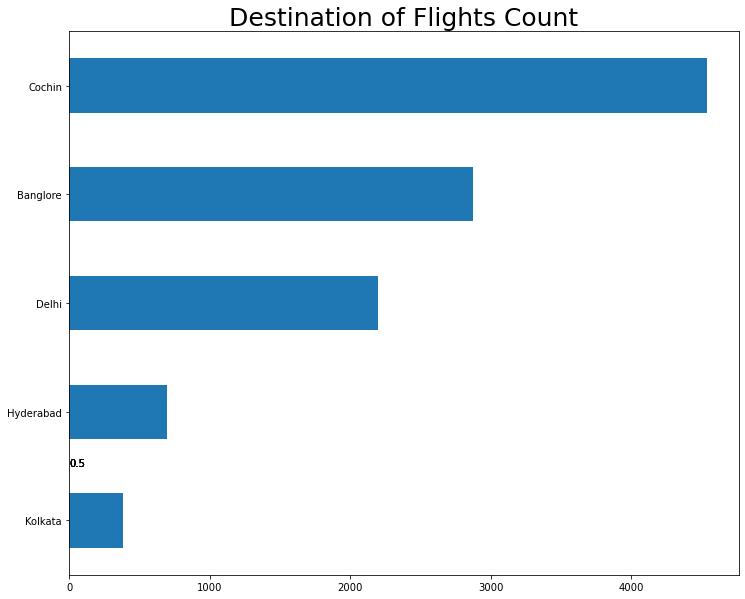

In [70]:
destination = df['Destination'].value_counts()
ax = destination.nsmallest(n=20, keep='first').plot(kind='barh',figsize=(12,10))
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))
ax.set_title("Destination of Flights Count", size=25);

#### Most peoples flight destination is Cochin and Banglore and the least visited detination is Kolkata.

### Destination vs Price

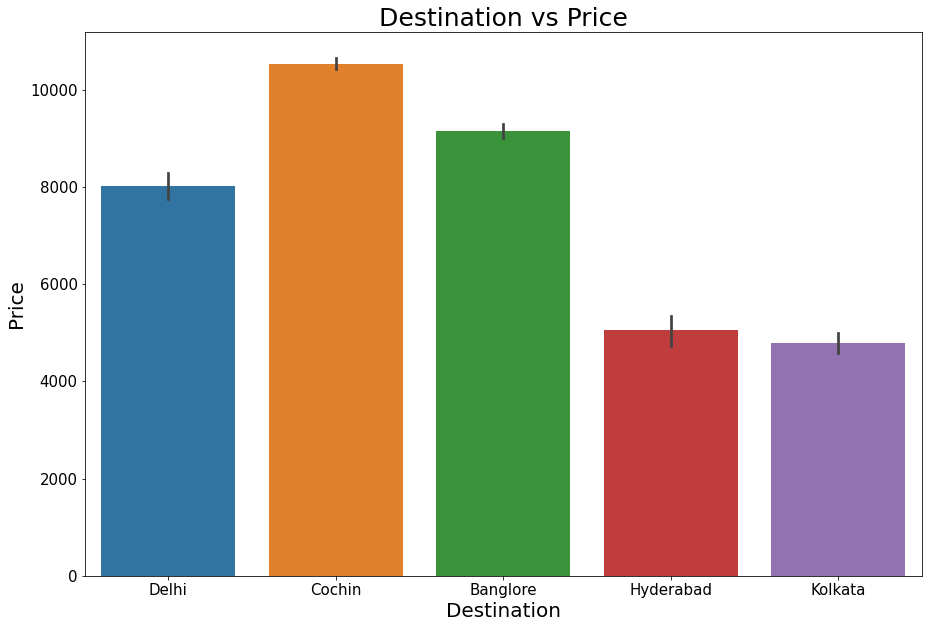

In [71]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.title("Destination vs Price", size = 25)
plt.xlabel("Destination", size = 20)
plt.ylabel("Price", size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show;

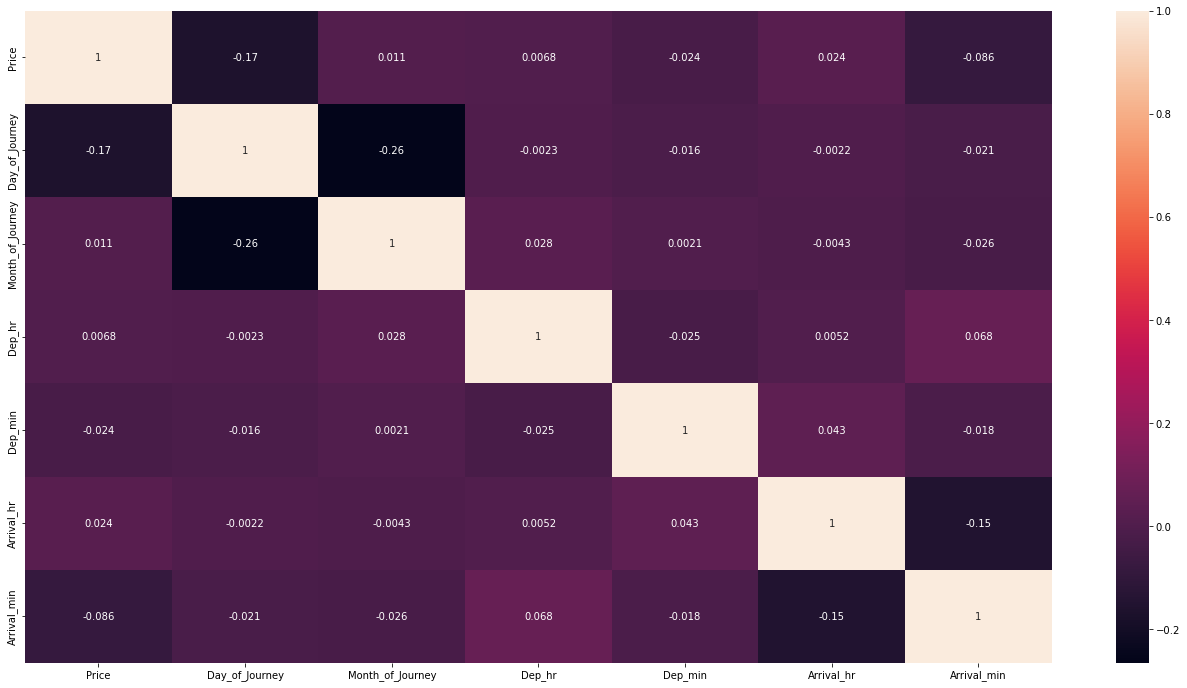

In [74]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True);

### Applying Onehot Encoding to make categorical variables numeric

In [75]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [76]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [77]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,duration_hr,duration_min,Arrival_hr,Arrival_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,2,50,1,10
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,7,25,13,15
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,19,00,4,25
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,5,25,23,30
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,4,45,21,35


In [78]:
df.shape

(10682, 31)

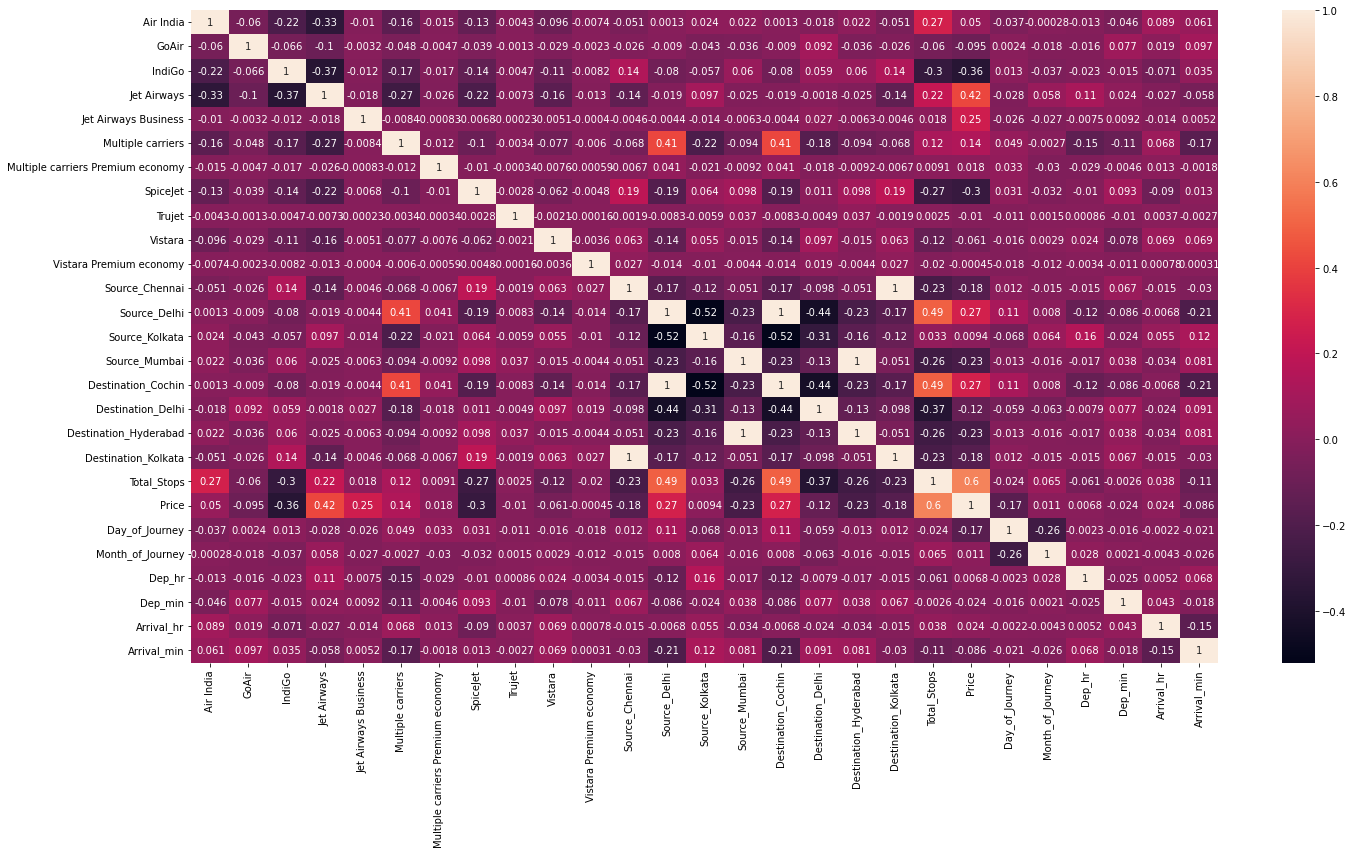

In [80]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True);

###  Preparing Tests Data
##### Performing same steps as done earlier with test data.

In [88]:
df_test=pd.read_excel("Test_set.xlsx")
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [89]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [90]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [91]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,duration_hr,duration_min,Arrival_hr,Arrival_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,2,50,1,10
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,7,25,13,15
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,19,00,4,25
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,5,25,23,30
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,4,45,21,35


In [92]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

### Model Building
##### ExtraTreesRegressor

In [93]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

#### Graphing in order which features had the most impact in the algorithm

<AxesSubplot:>

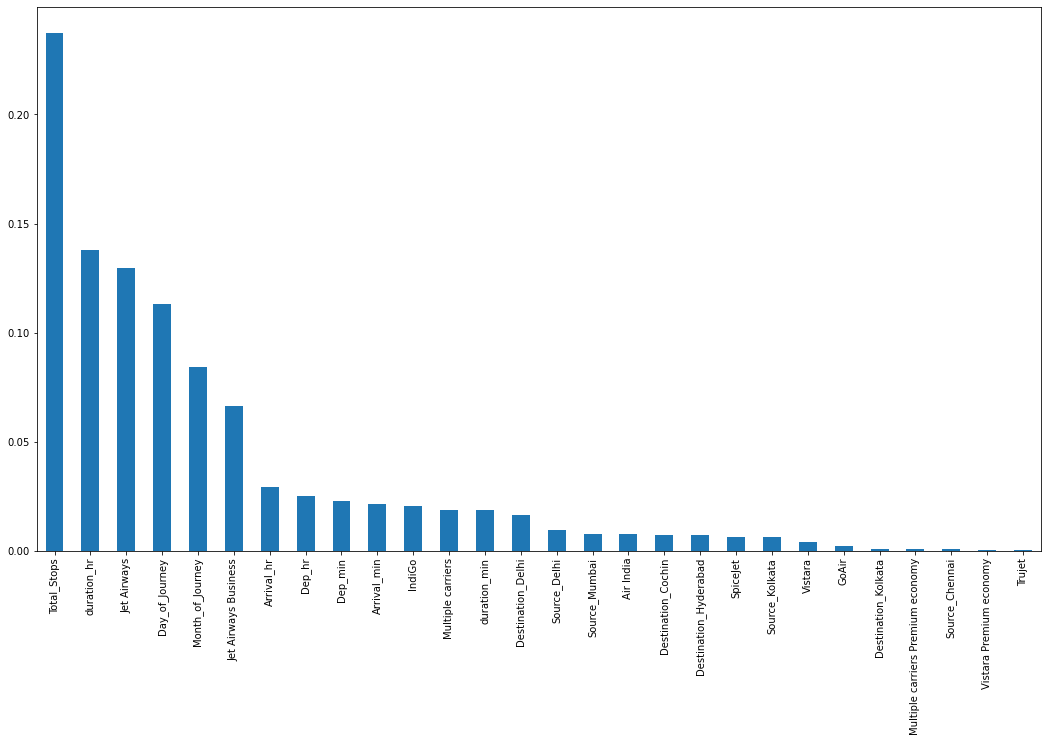

In [94]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [96]:
# Splitting the data set

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [98]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.766163674153473

In [99]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7914951664140375

#### Random Forest does a bit better than Extra Tree Regressor

#### Adjusting hyperparameters with cross validation

In [101]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [102]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [103]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12553.13269301,  4287.09519738,  6140.43371317, ...,
       11613.44631073,  9654.24801579,  8665.28939104])

In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,rf_pred)))

MAE 1156.1467386818372
RMSE 1987.5244249788918


In [108]:
r2_score(y_test,rf_pred)

0.8076207373013945

### CatBoost Algorithm

In [110]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 159ms	remaining: 2m 39s
1:	learn: 4312.4694692	total: 168ms	remaining: 1m 23s
2:	learn: 4163.7755049	total: 178ms	remaining: 59.2s
3:	learn: 4026.2140471	total: 189ms	remaining: 47s
4:	learn: 3905.1462969	total: 198ms	remaining: 39.4s
5:	learn: 3784.1485163	total: 213ms	remaining: 35.3s
6:	learn: 3672.6675250	total: 226ms	remaining: 32.1s
7:	learn: 3579.2271805	total: 236ms	remaining: 29.3s
8:	learn: 3490.7567415	total: 245ms	remaining: 26.9s
9:	learn: 3406.0593220	total: 252ms	remaining: 25s
10:	learn: 3326.5338870	total: 261ms	remaining: 23.4s
11:	learn: 3257.8654170	total: 268ms	remaining: 22.1s
12:	learn: 3193.8727197	total: 275ms	remaining: 20.9s
13:	learn: 3132.3068661	total: 283ms	remaining: 19.9s
14:	learn: 3069.3768464	total: 290ms	remaining: 19s
15:	learn: 3014.6766736	total: 298ms	remaining: 18.3s
16:	learn: 2962.2750566	total: 306ms	remaining: 17.7s
17:	learn: 2915.5789004	total: 313ms	remaining: 17.1s
18:	learn: 2

178:	learn: 1916.1328477	total: 1.42s	remaining: 6.49s
179:	learn: 1915.2542208	total: 1.42s	remaining: 6.48s
180:	learn: 1914.0538874	total: 1.43s	remaining: 6.46s
181:	learn: 1911.4342846	total: 1.43s	remaining: 6.43s
182:	learn: 1909.7069931	total: 1.44s	remaining: 6.42s
183:	learn: 1907.8393259	total: 1.44s	remaining: 6.41s
184:	learn: 1906.6259913	total: 1.45s	remaining: 6.38s
185:	learn: 1904.4422660	total: 1.46s	remaining: 6.37s
186:	learn: 1903.2116536	total: 1.46s	remaining: 6.35s
187:	learn: 1902.1020568	total: 1.46s	remaining: 6.32s
188:	learn: 1900.5664983	total: 1.47s	remaining: 6.32s
189:	learn: 1897.8998367	total: 1.48s	remaining: 6.3s
190:	learn: 1896.3504856	total: 1.48s	remaining: 6.29s
191:	learn: 1894.5901032	total: 1.49s	remaining: 6.27s
192:	learn: 1892.2414178	total: 1.49s	remaining: 6.25s
193:	learn: 1890.5940444	total: 1.5s	remaining: 6.24s
194:	learn: 1889.1236281	total: 1.5s	remaining: 6.21s
195:	learn: 1888.3455406	total: 1.51s	remaining: 6.19s
196:	learn: 1

343:	learn: 1715.1584161	total: 2.27s	remaining: 4.33s
344:	learn: 1713.9458822	total: 2.28s	remaining: 4.33s
345:	learn: 1713.7767330	total: 2.29s	remaining: 4.33s
346:	learn: 1713.5435113	total: 2.29s	remaining: 4.31s
347:	learn: 1713.3925300	total: 2.3s	remaining: 4.31s
348:	learn: 1712.3711260	total: 2.31s	remaining: 4.31s
349:	learn: 1711.5786325	total: 2.32s	remaining: 4.3s
350:	learn: 1710.0894413	total: 2.32s	remaining: 4.3s
351:	learn: 1708.8142936	total: 2.33s	remaining: 4.28s
352:	learn: 1707.5523408	total: 2.34s	remaining: 4.28s
353:	learn: 1706.7640434	total: 2.34s	remaining: 4.27s
354:	learn: 1706.6435967	total: 2.35s	remaining: 4.26s
355:	learn: 1705.8129259	total: 2.35s	remaining: 4.25s
356:	learn: 1704.5768530	total: 2.36s	remaining: 4.24s
357:	learn: 1703.5779353	total: 2.36s	remaining: 4.24s
358:	learn: 1702.3726606	total: 2.37s	remaining: 4.23s
359:	learn: 1701.3926351	total: 2.37s	remaining: 4.22s
360:	learn: 1700.5953268	total: 2.38s	remaining: 4.21s
361:	learn: 1

503:	learn: 1598.6443904	total: 3.13s	remaining: 3.08s
504:	learn: 1597.6842149	total: 3.13s	remaining: 3.07s
505:	learn: 1597.6747773	total: 3.14s	remaining: 3.07s
506:	learn: 1597.1136154	total: 3.15s	remaining: 3.06s
507:	learn: 1597.0066511	total: 3.15s	remaining: 3.05s
508:	learn: 1596.9409969	total: 3.18s	remaining: 3.06s
509:	learn: 1596.9352816	total: 3.18s	remaining: 3.06s
510:	learn: 1595.9871466	total: 3.19s	remaining: 3.05s
511:	learn: 1595.5499946	total: 3.19s	remaining: 3.05s
512:	learn: 1595.0945776	total: 3.2s	remaining: 3.04s
513:	learn: 1594.2360454	total: 3.21s	remaining: 3.03s
514:	learn: 1594.2288831	total: 3.21s	remaining: 3.02s
515:	learn: 1593.1080060	total: 3.21s	remaining: 3.02s
516:	learn: 1592.6345971	total: 3.22s	remaining: 3.01s
517:	learn: 1591.9413166	total: 3.23s	remaining: 3s
518:	learn: 1591.9324969	total: 3.23s	remaining: 2.99s
519:	learn: 1591.9271928	total: 3.23s	remaining: 2.99s
520:	learn: 1591.2676385	total: 3.24s	remaining: 2.98s
521:	learn: 15

655:	learn: 1514.0731772	total: 3.98s	remaining: 2.09s
656:	learn: 1513.5346368	total: 3.99s	remaining: 2.08s
657:	learn: 1512.9302448	total: 4s	remaining: 2.08s
658:	learn: 1512.1783691	total: 4s	remaining: 2.07s
659:	learn: 1511.5561456	total: 4.01s	remaining: 2.06s
660:	learn: 1511.3192560	total: 4.01s	remaining: 2.06s
661:	learn: 1510.8164078	total: 4.02s	remaining: 2.05s
662:	learn: 1510.4487265	total: 4.03s	remaining: 2.05s
663:	learn: 1509.7293956	total: 4.04s	remaining: 2.04s
664:	learn: 1508.9599817	total: 4.05s	remaining: 2.04s
665:	learn: 1508.4599047	total: 4.06s	remaining: 2.03s
666:	learn: 1507.8210971	total: 4.06s	remaining: 2.03s
667:	learn: 1507.4802492	total: 4.07s	remaining: 2.02s
668:	learn: 1506.8546506	total: 4.08s	remaining: 2.02s
669:	learn: 1506.4241429	total: 4.11s	remaining: 2.02s
670:	learn: 1506.1689100	total: 4.12s	remaining: 2.02s
671:	learn: 1505.7129976	total: 4.13s	remaining: 2.01s
672:	learn: 1505.3049176	total: 4.14s	remaining: 2.01s
673:	learn: 1504

832:	learn: 1442.1704516	total: 5.04s	remaining: 1.01s
833:	learn: 1441.6954148	total: 5.05s	remaining: 1s
834:	learn: 1441.0369198	total: 5.05s	remaining: 999ms
835:	learn: 1440.8409030	total: 5.06s	remaining: 992ms
836:	learn: 1440.7268255	total: 5.07s	remaining: 987ms
837:	learn: 1440.5390615	total: 5.07s	remaining: 980ms
838:	learn: 1440.3992135	total: 5.08s	remaining: 974ms
839:	learn: 1440.0957682	total: 5.08s	remaining: 968ms
840:	learn: 1439.4572565	total: 5.09s	remaining: 962ms
841:	learn: 1439.1294432	total: 5.09s	remaining: 955ms
842:	learn: 1438.8482259	total: 5.1s	remaining: 949ms
843:	learn: 1438.4460442	total: 5.1s	remaining: 943ms
844:	learn: 1438.4417117	total: 5.11s	remaining: 937ms
845:	learn: 1438.0921465	total: 5.11s	remaining: 931ms
846:	learn: 1437.8556146	total: 5.12s	remaining: 925ms
847:	learn: 1437.8535204	total: 5.12s	remaining: 918ms
848:	learn: 1437.7171109	total: 5.13s	remaining: 912ms
849:	learn: 1437.3494870	total: 5.13s	remaining: 906ms
850:	learn: 143

994:	learn: 1389.7687503	total: 5.91s	remaining: 29.7ms
995:	learn: 1389.7658083	total: 5.92s	remaining: 23.8ms
996:	learn: 1389.2947331	total: 5.93s	remaining: 17.8ms
997:	learn: 1389.0194995	total: 5.93s	remaining: 11.9ms
998:	learn: 1388.8706961	total: 5.94s	remaining: 5.95ms
999:	learn: 1388.6083196	total: 5.95s	remaining: 0us


In [111]:
cat_pred=cat.predict(X_test)

In [112]:
r2_score(y_test,cat_pred)

0.828845678454214

#### CatBoost has the best results so I will deploy this one

In [114]:
import pickle 

pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [115]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [116]:
deploy_df.to_csv('deploy_df')